### Robustness check - debt

In [2]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import sharpe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

### How is pi affected by increasing interest rates?

In [4]:
rfs = np.round(np.arange(0.02, 0.07, 0.005), 4)
rms = np.arange(0.023, 0.09, 0.005)

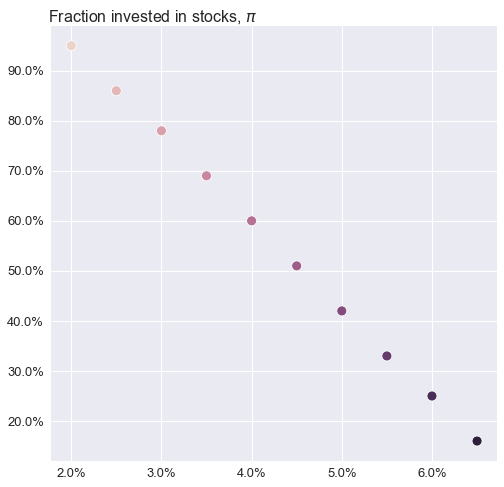

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(y=[round(cr.pi_arr(rate, 2, 0.02837, 0.076, 0.002)*100, 0) for rate in rfs], x=rfs*100, hue=rfs, legend=False, s=100)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:}%".format(x)))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: "{}%".format(y)))
ax.set_ylabel('Fraction invested in stocks, $\pi$', loc='top', rotation=0, labelpad=-250)
#ax.set_xlabel('Interest rate')
fig.savefig('Robustness/pi_cost_of_debt.png', bbox_inches = 'tight', pad_inches = 0.1, dpi=192)
#sns.lineplot(y=[cr.pi_arr(rate, 2, 0.02837, 0.076, 0.002) for rate in rms], x=rms)

### Effect on performance

In [8]:
ports2 = cr.fetch_returns('garch', range(10000), YEARLY_RM = 0.023)
ports3 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.03)
ports4 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.04)
ports5 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.05)

### Dual phase

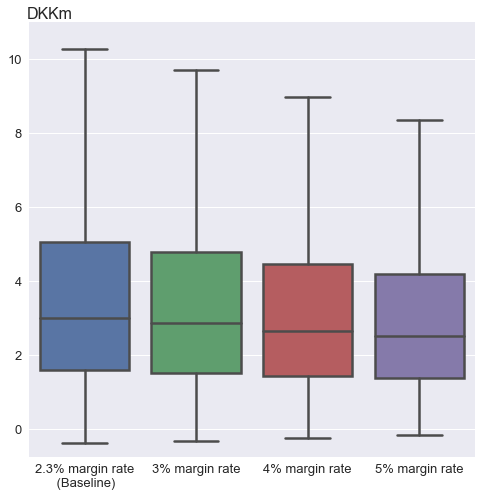

In [13]:
data=ports2.loc[:, ["dual_phase"]]
data.columns=['2.3% margin rate\n (Baseline)']
data["3% margin rate"]=ports3["dual_phase"]
data["4% margin rate"]=ports4["dual_phase"]
data["5% margin rate"]=ports5["dual_phase"]

x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("DKKm", loc='top', rotation=0, labelpad=-65)
ax.set_xlabel("")
plt.ylim(-0.75,11)
f.savefig("Robustness/boxplot_higher_margin_rate_dual.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

### Single phase

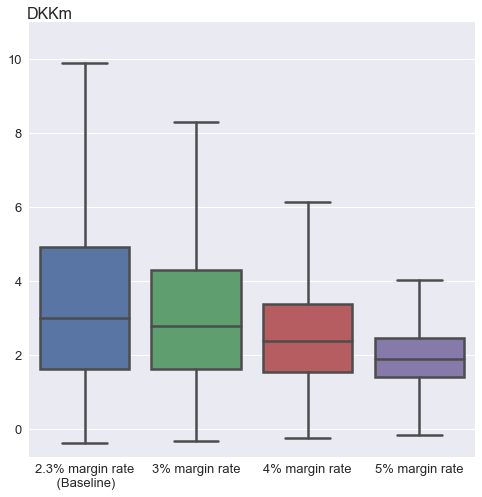

In [15]:
data=ports2.loc[:, ["single_phase"]]
data.columns=['2.3% margin rate\n (Baseline)']
data["3% margin rate"]=ports3["single_phase"]
data["4% margin rate"]=ports4["single_phase"]
data["5% margin rate"]=ports5["single_phase"]

x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("DKKm", loc='top', rotation=0, labelpad=-65)
ax.set_xlabel("")
plt.ylim(-0.75,11)
#ax.set_yticklabels(style='plain', axis='y',useOffset=True)
f.savefig("Robustness/boxplot_higher_margin_rate_single.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=192)

### Calculating sharpe ratio

In [3]:
sharpe2 = sharpe.calculate_sharpe(ports2)
sharpe3 = sharpe.calculate_sharpe(ports3)
sharpe4 = sharpe.calculate_sharpe(ports4)
sharpe5 = sharpe.calculate_sharpe(ports5)

In [4]:
print(sharpe2.std())
print(sharpe3.std())
print(sharpe4.std())
print(sharpe5.std())

Dual phase     0.090
Single phase   0.090
100% stocks    0.088
Life cycle     0.092
dtype: float64
Dual phase     0.088
Single phase   0.086
100% stocks    0.087
Life cycle     0.092
dtype: float64
Dual phase     0.085
Single phase   0.079
100% stocks    0.086
Life cycle     0.092
dtype: float64
Dual phase     0.081
Single phase   0.071
100% stocks    0.085
Life cycle     0.092
dtype: float64


In [4]:
mean_median_2 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe2.mean(), sharpe2.median())]
mean_median_3 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe3.mean(), sharpe3.median())]
mean_median_4 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe4.mean(), sharpe4.median())]
mean_median_5 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe5.mean(), sharpe5.median())]

In [5]:
pd.DataFrame([mean_median_2, mean_median_3, mean_median_4, mean_median_5],
             columns=['Dual phase', 'Single phase', 'All stock', 'Life cycle'],
             index = pd.Index(['2.3% margin rate', '3% margin rate', '4% margin rate', '5% margin rate'])).to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} &     Dual phase &   Single phase &      All stock &     Life cycle \\\\\n\\midrule\n2.3\\% margin rate &  0.161 [0.174] &  0.159 [0.171] &  0.152 [0.146] &  0.124 [0.119] \\\\\n3\\% margin rate   &  0.161 [0.172] &  0.151 [0.164] &  0.151 [0.146] &  0.124 [0.118] \\\\\n4\\% margin rate   &  0.160 [0.170] &  0.140 [0.152] &  0.150 [0.145] &  0.123 [0.117] \\\\\n5\\% margin rate   &  0.159 [0.167] &  0.126 [0.136] &  0.149 [0.144] &  0.122 [0.116] \\\\\n\\bottomrule\n\\end{tabular}\n'

#### Distribution of sharpe ratios

In [102]:
import sharpe

<AxesSubplot:ylabel='Density'>

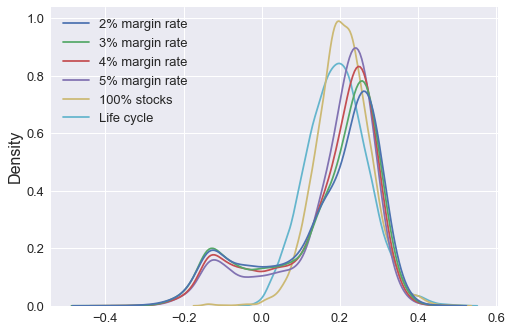

In [104]:
data=sharpe2.loc[:, ["Dual phase"]]
data.columns=['2.3% margin rate']
data["3% margin rate"]=sharpe3["Dual phase"]
data["4% margin rate"]=sharpe4["Dual phase"]
data["5% margin rate"]=sharpe5["Dual phase"]
data["100% stocks"]=sharpe5["100% stocks"]
data["Life cycle"]=sharpe5["Life cycle"]

sns.kdeplot(data = data)

Certainty Equivalent

In [9]:
#sharpe.CE_ports(ports2,risk_premium=True)
#sharpe.CE_ports(ports3,risk_premium=True)
#sharpe.CE_ports(ports4,risk_premium=True)
sharpe.CE_ports(ports5,risk_premium=True)

,dual_phase,single_phase,100,9050
Certainty Equivalent,87.170,-6.345,132.681,50.127


Default risk

In [19]:
ports2_defaulted = ports2.loc[(slice(None), '2070-01-01'),:]
ports2_defaulted =ports2_defaulted[ports2_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_ports2=ports2_defaulted['random_state'].tolist()

ports3_defaulted = ports3.loc[(slice(None), '2070-01-01'),:]
ports3_defaulted =ports3_defaulted[ports3_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_ports3=ports3_defaulted['random_state'].tolist()

ports4_defaulted = ports4.loc[(slice(None), '2070-01-01'),:]
ports4_defaulted =ports4_defaulted[ports4_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_ports4=ports4_defaulted['random_state'].tolist()

ports5_defaulted = ports5.loc[(slice(None), '2070-01-01'),:]
ports5_defaulted =ports5_defaulted[ports5_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_ports5=ports5_defaulted['random_state'].tolist()
#print number of defaults
print(len(defaulted_ports2))
print(len(defaulted_ports3))
print(len(defaulted_ports4))
print(len(defaulted_ports5))

112
120
120
115
